# **STAT 640 : Homework 3**
## Pavan Malapati
## tq8817


## Exercise 2.27

A stick is broken at random into three pieces. What is the probability that these pieces can be the sides of a triangle?

Simulated N (Poisson): 78, Simulated X (Binomial given N): 73
Estimated Probability of forming a triangle: 0.2450
Linear Regression Model (with intercept):
MSE: 0.1836, R^2: -0.0001
Linear Regression Model (without intercept):
MSE: 0.1895, R^2: -0.0322


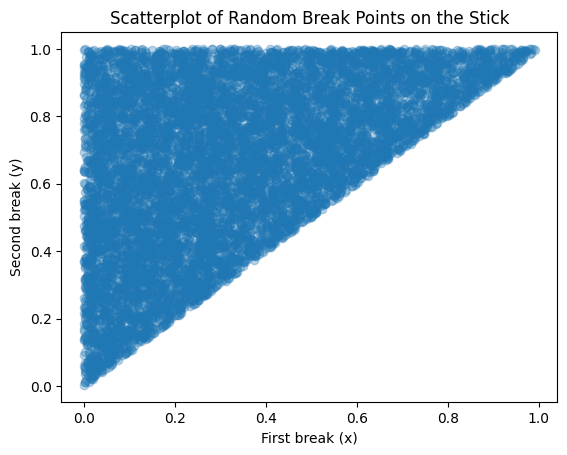

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Function to check if the three pieces can form a triangle
def can_form_triangle(x, y):
    a = x
    b = y - x
    c = 1 - y
    return int(a + b > c and b + c > a and c + a > b)

# Simulate stick breaking and check for triangle formation
def generate_stick_data(num_samples=10000):
    break_points = np.random.uniform(0, 1, size=(num_samples, 2))
    break_points.sort(axis=1)  # Ensure x < y
    outcomes = np.array([can_form_triangle(x, y) for x, y in break_points])  # 1 if forms a triangle, else 0
    return break_points, outcomes

# Prompt 1: Simulate data from a bivariate distribution
def simulate_bivariate_data():
    # Simulate N from a Poisson distribution with mean 100
    N = np.random.poisson(lam=100)
    # Simulate X given N from a Binomial distribution with p=0.95
    X = np.random.binomial(n=N, p=0.95)
    return N, X

# Simulate bivariate data
N, X = simulate_bivariate_data()
print(f"Simulated N (Poisson): {N}, Simulated X (Binomial given N): {X}")

# Generate stick data for triangle formation
num_samples = 10000
break_points, outcomes = generate_stick_data(num_samples)

# probability of forming a triangle
triangle_probability = np.mean(outcomes)
print(f"Estimated Probability of forming a triangle: {triangle_probability:.4f}")

X_train, X_test, y_train, y_test = train_test_split(break_points, outcomes, test_size=0.3, random_state=42)

# Fitting the linear regression model (with intercept)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Linear Regression Model (with intercept):\nMSE: {mse:.4f}, R^2: {r2:.4f}")

# Fitting a linear regression model without an intercept
model_no_intercept = LinearRegression(fit_intercept=False)
model_no_intercept.fit(X_train, y_train)
y_pred_no_intercept = model_no_intercept.predict(X_test)
mse_no_intercept = mean_squared_error(y_test, y_pred_no_intercept)
r2_no_intercept = r2_score(y_test, y_pred_no_intercept)
print(f"Linear Regression Model (without intercept):\nMSE: {mse_no_intercept:.4f}, R^2: {r2_no_intercept:.4f}")

# Scatterplot of the breaking points
plt.scatter(break_points[:, 0], break_points[:, 1], alpha=0.3)
plt.title("Scatterplot of Random Break Points on the Stick")
plt.xlabel("First break (x)")
plt.ylabel("Second break (y)")
plt.show()

## Exercise 2.42

Prepare a table of P.D.F and C.D.F of the binomial distribution B(20,0.17).

In [ ]:
import pandas as pd
from scipy.stats import binom

n = 20
p = 0.17
k_values = np.arange(0, n+1)

# Calculate the probability mass function (pmf)
pmf_values = binom.pmf(k_values, n, p)

# Calculate the cumulative distribution function (cdf)
cdf_values = binom.cdf(k_values, n, p)

table = pd.DataFrame({
    'k': k_values,
    'PMF': pmf_values,
    'CDF': cdf_values
})
print(table)

     k           PMF       CDF
0    0  2.407475e-02  0.024075
1    1  9.861947e-02  0.122694
2    2  1.918921e-01  0.314586
3    3  2.358192e-01  0.550406
4    4  2.052764e-01  0.755682
5    5  1.345426e-01  0.890224
6    6  6.889229e-02  0.959117
7    7  2.822094e-02  0.987338
8    8  9.392812e-03  0.996731
9    9  2.565105e-03  0.999296
10  10  5.779213e-04  0.999874
11  11  1.076086e-04  0.999981
12  12  1.653023e-05  0.999998
13  13  2.083514e-06  1.000000
14  14  2.133719e-07  1.000000
15  15  1.748107e-08  1.000000
16  16  1.118894e-09  1.000000
17  17  5.392260e-11  1.000000
18  18  1.840731e-12  1.000000
19  19  3.968602e-14  1.000000
20  20  4.064231e-16  1.000000
